<h1 align=center>Processamento Avançado de Linguagem Natural</h1>
<p align=center><img src= https://imagens.itforum.com.br/itforum.com.br/wp-content/uploads/2021/05/AdobeStock_230030937-1-scaled.jpeg width=500></p>

Este capítulo aborda várias técnicas avançadas de NLP e utiliza algoritmos de aprendizado de máquina para extrair informações de dados de texto e aplicativos avançados de NLP com uma abordagem de solução e implementação.
* Receita 1. Extração de frases nominais
* Receita 2. Similaridade de texto
* Receita 3. Marcação de classes gramaticais
* Receita 4. Extração de informações – NER – reconhecimento de entidade
* Receita 5. Modelagem de tópicos
* Receita 6. Classificação de texto
* Receita 7. Análise de sentimentos
* Receita 8. Desambiguação do sentido da palavra
* Receita 9. Reconhecimento de fala e fala para texto
* Receita 10. Texto para fala
* Receita 11. Detecção e tradução de linguagem

Antes de entrar nas receitas, vamos primeiro entender o pipeline e o ciclo de vida do NLP. Há muitos conceitos implementados neste livro e você pode ficar sobrecarregado com o conteúdo. Para torná-lo mais simples e suave, vamos ver o fluxo que você precisa seguir para uma solução de NLP.

Por exemplo, vamos considerar a análise e previsão do sentimento do cliente para um produto, marca ou serviço.
* **Defina o problema**. Entenda o sentimento do cliente em relação aos produtos.
* **Entenda a profundidade e amplitude do problema**. Entenda os sentimentos do cliente/usuário em relação ao produto. Por que estamos fazendo isso? Qual é o impacto nos negócios?
* **Faça um brainstorming de requisitos de dados**. Tenha uma atividade de brainstorming para listar todos os pontos de dados possíveis.
    * Todos os comentários de clientes em plataformas de comércio eletrônico como Amazon, Flipkart e assim por diante
    * E-mail enviado por clientes
    * Formulários de reivindicação de garantia
    * Dados de pesquisa
    * Conversas de call center usando voz para texto
    * Formulários de feedback
    * Dados de mídia social como Twitter, Facebook e LinkedIn
* **Coleta de dados**: Você aprendeu diferentes técnicas para coletar os dados no Capítulo 1. Com base nos dados e no problema, pode ser necessário incorporar diferentes métodos de coleta de dados. Nesse caso, você pode usar web scraping e APIs do Twitter.
* **Pré-processamento de texto**: você sabe que os dados nem sempre estarão limpos. Você precisa gastar uma quantidade significativa de tempo processando-o e extraindo insights usando os métodos discutidos no Capítulo 2.
* **Text to feature**: O texto é composto de caracteres e as máquinas têm dificuldade em entendê-los. Usando qualquer um dos métodos que você aprendeu nos capítulos anteriores, você os converte em recursos que máquinas e algoritmos podem entender.
* **Aprendizado de máquina/aprendizagem profunda**: O aprendizado de máquina e o aprendizado profundo fazem parte de um guarda-chuva de inteligência artificial que faz com que os sistemas aprendam padrões automaticamente nos dados sem serem programados. A maioria das soluções de NLP são baseadas nisso. Como o texto é convertido em recursos, você pode aproveitar algoritmos de aprendizado de máquina ou aprendizado profundo para atingir objetivos como classificação de texto e geração de linguagem natural.
* **Insights e implantação**: Não adianta criar soluções de NLP sem que os insights adequados sejam comunicados ao negócio. Sempre reserve um tempo para conectar os pontos entre a saída do modelo/análise e o negócio, criando assim o máximo impacto.

## Receita 4-1. Extraindo o substantivo da frase
Esta receita extrai o substantivo da frase dos dados de texto (uma frase ou os documentos).
### Problema
Você deseja extrair o substantivo de uma frase.
### Solução
A extração de substantivos das frases é importante quando você deseja analisar quem em uma frase. Vejamos um exemplo usando TextBlob.
### Como funciona
Execute o código a seguir para extrair o substantivo das frases.

In [4]:
import nltk
from textblob import TextBlob
#Extract noun
blob = TextBlob("John is learning natural language processing")
for np in blob.noun_phrases:
    print(np)

john
natural language processing


## Receita 4-2. Encontrando semelhança entre textos
Esta receita discute como encontrar a semelhança entre dois documentos ou texto. Existem muitas métricas semelhantes, como euclidiana, cosseno e Jaccard. Aplicações de similaridade de texto podem ser encontradas em correção ortográfica, desduplicação de dados, triagem de currículos, aplicativos de pesquisa em vários domínios e sistema de recomendação baseado em conteúdo.
Aqui estão algumas das medidas de similaridade.
* **Similaridade do cosseno**: Calcula o cosseno do ângulo entre os dois vetores.
* **Similaridade de Jaccard**: A pontuação é calculada a partir da interseção ou união de palavras.
* **Índice de Jaccard**: (o número em ambos os conjuntos) / (o número em qualquer um dos conjuntos) * 100.
* **Distância de Levenshtein**: Um número mínimo de inserções, exclusões e substituições é necessário para transformar a string a na string b.
* **Hamming distance**: O número de posições com o mesmo símbolo em ambas as strings. Ele pode ser definido apenas para strings com comprimento igual. Você deseja encontrar as semelhanças entre texto e documentos.

### Solução
A maneira mais simples de fazer isso é usando a similaridade de cosseno da biblioteca sklearn.
### Como funciona
Siga as etapas nesta seção para calcular a pontuação de similaridade entre documentos de texto.
#### Etapa 2-1. Criar/ler os dados de texto
Aqui estão os dados.

In [5]:
documents = (
    "I like NLP",
    "I am exploring NLP",
    "I am a beginner in NLP",
    "I want to learn NLP",
    "I like advanced NLP"
)

#### Etapa 2-2. Encontrar semelhanças
Execute o código a seguir para encontrar a semelhança.

In [6]:
#Import libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
#Compute tfidf : feature engineering(refer previous chapter – Recipe 3-4)
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
tfidf_matrix.shape

(5, 10)

In [7]:
#compute similarity for first sentence with rest of the sentences
cosine_similarity(tfidf_matrix[0:1],tfidf_matrix)

array([[1.        , 0.17682765, 0.14284054, 0.13489366, 0.68374784]])

A primeira frase e a última frase têm maior semelhança em comparação com o resto das frases.

## Receita 4-3. Marcando parte do discurso
A marcação de parte do discurso (POS) é outra parte crucial do processamento de linguagem natural que envolve rotular as palavras com uma parte do discurso, como substantivo, verbo, adjetivo e assim por diante. POS é a base para resolução de entidade nomeada, resposta a perguntas e desambiguação de sentido de palavra.
### Problema
Você deseja marcar as partes do discurso em uma frase.
### Solução
Há duas maneiras de construir um tagger.
* **Rule-based**: Regras criadas manualmente, que marcam uma palavra pertencente a um determinado POS.
* **Com base estocástica**: Esses algoritmos capturam a sequência das palavras e marcam a probabilidade da sequência usando modelos ocultos de Markov.

### Como Funciona
Mais uma vez, o NLTK tem o melhor módulo de etiquetagem POS. **nltk.pos_tag(word)** é a função que gera a marcação POS para qualquer palavra. Use **for loop** e gere POS para todas as palavras presentes no documento.

#### Etapa 3-1. Armazene o texto em uma variável
Aqui está a variável.

In [10]:
Text = "I love NLP and I will learn NLP in 2 month"

#### Etapa 3-2. Importar NLTK para POS
Aqui está o código.

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
stop_words = set(stopwords.words('english'))

# Tokenize o texto
tokens = sent_tokenize(Text)

# Generate tagging for all the tokens using loop
for i in tokens:
    words = nltk.word_tokenize(i)
    words = [w for w in words if not w in stop_words]
    # POS-tagger.
    tags = nltk.pos_tag(words)
tags

[('I', 'PRP'),
 ('love', 'VBP'),
 ('NLP', 'NNP'),
 ('I', 'PRP'),
 ('learn', 'VBP'),
 ('NLP', 'RB'),
 ('2', 'CD'),
 ('month', 'NN')]

A seguir estão os formulários curtos e as explicações da marcação de POV. A palavra *love* é VBP, que significa verbo, cantar. presente, tomada não 3D.
* Conjunção coordenadora CC
* CD dígitos cardinais
* DT determinante
* EX existencial lá (por exemplo, existência de algo)
* FW palavra estrangeira
* IN preposição/conjunção subordinativa
* Adjetivo JJ, por exemplo: *big*
* Adjetivo JJR, comparativo, por exemplo: *bigger*
* Adjetivo JJS, superlativo, por exemplo: *bigest*
* Marcador de lista LS 1)
* MD modal could, *will*
* NN substantivo, singular *desk*
* NNS substantivo plural *desks*
* NNP substantivo próprio, singular *Harrison*
* NNPS nome próprio, plural *Americans*
* PDT predetermina *all the kids*
* POS pais da terminação possessiva
* PRP pronome pessoal *I*, *he*, *she*
* PRP$ pronome possessivo *my*, *his*, *her*

* advérbio RB, *silenty*
* advérbio RBR, comparativo *better*
* RBS advérbio, superlative *best*
* Partícula RP *give up*
* TO to go *to* the store
* UH interjeição
* VB verb, base form *take*
* VBD verb, past tense *took*
* VBG verb, gerund/present particíple *taking*
* VBN verb, past particípio *taken*
* VBP verbo, cantar, presente.não 3D. *take*
* Verbo VBZ, 3ª pessoa *takes*
* WDT wh-determinador *which*
* WP wh-pronome *who, what*
* WP$ possessivo wh-pronome *whose*
* WRB wh-advérbio *where, when*

## Receita 4-4. Extraindo Entidades do Texto
Esta receita discute como identificar e extrair entidades do texto, o que é chamado de reconhecimento de entidade nomeada. Várias bibliotecas executam essa tarefa, como NLTK chunker, Stanford NER, spaCy, OpenNLP e NeuroNER. E há muitas APIs, como Watson NLU, AlchemyAPI, NERD, Google Cloud Natural Language API e muito mais.
### Problema
Você deseja identificar e extrair entidades do texto.
### Solução
A maneira mais simples de fazer isso é usando o ne_chunk do NLTK ou spaCy.
### Como funciona
Siga as etapas nesta seção para executar o NER.
#### Etapa 4-1. Ler/criar os dados de texto
Este é o texto.

In [13]:
sent = "John is studying at Stanford University in California"

#### Usando NLTK

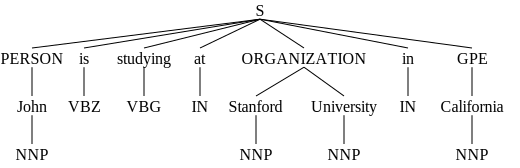

In [16]:
#import libraries
import nltk
from nltk import ne_chunk
from nltk import word_tokenize
#NER
ne_chunk(nltk.pos_tag(word_tokenize(sent)), binary=False)

#### Usando spaCy

In [9]:
import spacy
nlp = spacy.load(r'D:\WILLIAN\Anaconda3\envs\NLP_Recipes\Lib\site-packages\en_core_web_sm\en_core_web_sm-3.4.1')

# Read/create a sentence
doc = nlp(u'Apple is ready to launch new phone worth $10000 in New york time square')
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
10000 42 47 MONEY
New york 51 59 GPE


De acordo com a saída, a Apple é uma organização, 10.000 é dinheiro e Nova York é um lugar. Os resultados são precisos e podem ser usados em qualquer aplicação de NLP.

## Receita 4-5. Extraindo Tópicos do Texto
Esta receita discute como identificar tópicos do documento. Por exemplo, existe uma biblioteca online com vários departamentos com base no tipo/gênero do livro. Você analisa palavras-chave/tópicos exclusivos para decidir a qual departamento este livro provavelmente pertence e o coloca de acordo. Nesses tipos de situações, a modelagem de tópicos seria útil. É chamado de marcação e agrupamento de documentos.
### Problema
Você deseja extrair ou identificar tópicos de um documento.
### Solução
A maneira mais simples é usar a biblioteca gensim.
### Como funciona
Siga as etapas nesta seção para identificar tópicos em documentos usando gensim.
#### Etapa 5-1. Crie os dados de texto
Aqui está o texto.

In [1]:
doc1 = "I am learning NLP, it is very interesting and exciting. it includes machine learning and deep learning"
doc2 = "My father is a data scientist and he is nlp expert"
doc3 = "My sister has good exposure into android development"
doc_complete = [doc1, doc2, doc3]
doc_complete

['I am learning NLP, it is very interesting and exciting. it includes machine learning and deep learning',
 'My father is a data scientist and he is nlp expert',
 'My sister has good exposure into android development']

#### Etapa 5-2. Limpe e pré-processe os dados

In [4]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

# Processando o texto
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in doc_complete]
doc_clean

[['learning',
  'nlp',
  'interesting',
  'exciting',
  'includes',
  'machine',
  'learning',
  'deep',
  'learning'],
 ['father', 'data', 'scientist', 'nlp', 'expert'],
 ['sister', 'good', 'exposure', 'android', 'development']]

#### Etapa 5-3. Prepare a matriz de termos do documento
A seguir está o código.

In [6]:
import gensim
from gensim import corpora

# Criação do dicionário de termos do nosso corpus, onde cada termo único recebe um índice.
dictionary = corpora.Dictionary(doc_clean)

# Converter uma lista de documentos (corpus) em Document-Term Matrix usando o dicionário preparado acima.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 3), (5, 1), (6, 1)],
 [(6, 1), (7, 1), (8, 1), (9, 1), (10, 1)],
 [(11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]]

#### Etapa 5-4. Criar o modelo LDA
A parte final cria o modelo LDA.

In [9]:
# Criando o objeto para o modelo LDA usando a biblioteca gensim
lda = gensim.models.ldamodel.LdaModel

# Rodando e treinando LDA no documento da matriz por três topicos.
ldamodel = lda(doc_term_matrix, num_topics=3, id2word=dictionary, passes=50)
# Resultados
print(ldamodel.print_topics())

[(0, '0.129*"sister" + 0.129*"good" + 0.129*"exposure" + 0.129*"development" + 0.129*"android" + 0.032*"father" + 0.032*"scientist" + 0.032*"data" + 0.032*"expert" + 0.032*"nlp"'), (1, '0.173*"learning" + 0.121*"nlp" + 0.069*"deep" + 0.069*"interesting" + 0.069*"machine" + 0.069*"includes" + 0.069*"exciting" + 0.069*"scientist" + 0.069*"data" + 0.069*"father"'), (2, '0.063*"father" + 0.063*"data" + 0.063*"scientist" + 0.063*"expert" + 0.063*"nlp" + 0.062*"includes" + 0.062*"exciting" + 0.062*"interesting" + 0.062*"machine" + 0.062*"deep"')]


Todos os pesos associados aos tópicos da frase parecem quase semelhantes. Você pode fazer isso em documentos grandes para extrair tópicos importantes. A ideia de implementar isso em dados de amostra é torná-lo familiarizado com eles, e você pode usar o mesmo snippet de código para realizar grandes dados para obter resultados e insights significativos.

## Receita 4-6. Classificando o Texto
A classificação de texto classifica automaticamente documentos de texto com base em categorias pré-treinadas. Tem as seguintes aplicações.
* Análise de sentimentos
* Classificação de documentos
* Classificação de spam/ham mail
* Classificação de reclamações
* Classificação de produto
* Detecção de notícias falsas
### Problema
Classificação de spam/ham usando aprendizado de máquina.
### Solução
O Gmail tem uma pasta chamada Spam. Ele classifica seus e-mails em spam e ham para que você não precise ler e-mails desnecessários.
### Como funciona
Siga o método passo a passo para construir o classificador.

#### Etapa 6-1. Colete e entenda os dados

In [18]:
import pandas as pd
# Lendo os dados
Email_Data = pd.read_csv('spam.csv', encoding='latin1')

# Entendendo os dados
Email_Data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [19]:
Email_Data = Email_Data[['v1','v2']]
Email_Data = Email_Data.rename(columns={'v1':'Target',
                                        'v2':'Email'})
Email_Data.head()

,Target,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Etapa 6-2. Processamento de texto e engenharia de recursos
A seguir está o código.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import os
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm

#etapas de pré-processamento como letras minúsculas, lematização e lematização
Email_Data['Email'] = Email_Data['Email'].apply(lambda x: " ".join(x.lower() for x in x.split()))
stop = stopwords.words('english')
Email_Data['Email'] = Email_Data['Email'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
st = PorterStemmer()
Email_Data['Email'] = Email_Data['Email'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
Email_Data['Email'] = Email_Data['Email'].apply(lambda x: " ".join([Word
(word).lemmatize() for word in x.split()]))
Email_Data.head()

,Target,Email
0,ham,"go jurong point, crazy.. avail bugi n great wo..."
1,ham,ok lar... joke wif u oni...
2,spam,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,u dun say earli hor... u c alreadi say...
4,ham,"nah think goe usf, live around though"


In [21]:
# Splitting data into train and validation
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(Email_Data['Email'], Email_Data['Target'])

# TFIDF feature generation for a maximum of 5000 features
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(Email_Data['Email'])
xtrain_tfidf = tfidf_vect.transform(train_x)
xvalid_tfidf = tfidf_vect.transform(valid_x)
xtrain_tfidf.data

array([0.52225884, 0.47751253, 0.31365376, ..., 0.35762099, 0.29247274,
       0.3391114 ])

#### Etapa 6-3. Modelo de treinamento
Esta é a função generalizada para treinar qualquer modelo.

In [23]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    return metrics.accuracy_score(predictions, valid_y)

# Naive Bayes trainig
accuracy = train_model(naive_bayes.MultinomialNB(alpha=0.2), xtrain_tfidf, train_y, xvalid_tfidf)
print ("Accuracy: ", accuracy)

Accuracy:  0.9842067480258435


In [24]:
# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("Accuracy: ", accuracy)

Accuracy:  0.9626704953338119


O classificador Naive Bayes fornece melhores resultados do que o classificador linear. Você deve tentar alguns outros classificadores e depois escolher o melhor.

## Receita 4-7. Realizando Análise de Sentimentos
Esta receita discute o sentimento de uma determinada frase ou declaração. A análise de sentimentos é uma das técnicas amplamente utilizadas nas indústrias para entender os sentimentos dos clientes/usuários em relação aos produtos/serviços. A análise de sentimento fornece a pontuação de sentimento de uma frase/declaração tendendo para positivo ou negativo.
### Problema
Você quer fazer uma análise de sentimento.
### Solução
A maneira mais simples é usar TextBlob ou VADER.
### Como funciona
Siga as etapas nesta seção para fazer análise de sentimento usando TextBlob. Tem duas métricas.
* A polaridade está no intervalo de [–1,1], onde 1 significa uma afirmação positiva e –1 significa uma afirmação negativa.
* Subjetividade [0,1] é uma opinião e não informação factual.
#### Etapa 7-1. Criar os dados de amostra
Aqui estão os dados de amostra.

In [25]:
review = "I like this phone. screen quality and camera clarity is really good."
review2 = "This tv is not good. Bad quality, no clarity, worst experience"

#### Etapa 7-2. Limpe e pré-processe os dados

Consulte o Capítulo 2, Receita 2-10, para esta etapa.

#### Etapa 7-3. Obtenha as pontuações de sentimento
Use um TextBlob pré-treinado para obter as pontuações de sentimento.

In [26]:
from textblob import TextBlob
#TextBlob has a pre trained sentiment prediction model
blob = TextBlob(review)
blob.sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

Parece uma review positivo. (0.7)

In [27]:
blob = TextBlob(review2)
blob.sentiment

Sentiment(polarity=-0.6833333333333332, subjectivity=0.7555555555555555)

Claramente é um review negativo. -0.68.

> Observe que um caso de uso em tempo real na análise de sentimento com uma implementação de ponta a ponta é abordado na receita 5-2 no próximo capítulo.

## Receita 4-8. Texto desambiguado
A ambigüidade surge devido aos diferentes significados das palavras em um contexto diferente. Por exemplo,

In [28]:
Text1 = 'I went to the bank to deposit my money'
Text2 = 'The river bank was full of dead fish'

Nos textos, a palavra banco tem significados diferentes de acordo com o contexto da frase.
### Problema
Você quer entender o sentido da palavra sem ambiguidade.
### Solução
O algoritmo Lesk é um dos melhores algoritmos para desambiguação de sentido de palavra. Vejamos como resolvê-lo usando os pacotes pywsd e nltk.
### Como funciona
A seguir estão as etapas para alcançar os resultados.
#### Etapa 8-1. Importar bibliotecas
Primeiro, importe as bibliotecas.

In [29]:
from nltk.corpus import wordnet as wn
from nltk.stem import PorterStemmer
from itertools import chain
from pywsd.lesk import simple_lesk

Warming up PyWSD (takes ~10 secs)... took 1.9308173656463623 secs.


#### Etapa 8-2. Desambiguar o sentido da palavra
Aqui está o código.

In [30]:
# Sentences
bank_sents = ['I went to the bank to deposit my money', 'The river bank was full of dead fishes']

# calling the lesk function and printing results for both the sentences
print ("Context-1:", bank_sents[0])
answer = simple_lesk(bank_sents[0],'bank')
print ("Sense:", answer)
print ("Definition : ", answer.definition())
print ("Context-2:", bank_sents[1])
answer = simple_lesk(bank_sents[1],'bank','n')
print ("Sense:", answer)
print ("Definition : ", answer.definition())

Context-1: I went to the bank to deposit my money
Sense: Synset('depository_financial_institution.n.01')
Definition :  a financial institution that accepts deposits and channels the money into lending activities
Context-2: The river bank was full of dead fishes
Sense: Synset('bank.n.01')
Definition :  sloping land (especially the slope beside a body of water)


Observe que no contexto-1, “banco” é uma instituição financeira, mas no contexto-2, “banco” é um terreno inclinado.
## Receita 4-9. Convertendo fala em texto
A conversão de fala em texto é uma técnica de PNL muito útil.
### Problema
Você deseja converter fala em texto.
### Solução
A maneira mais simples é usar o reconhecimento de fala e o PyAudio.
### Como funciona
Siga as etapas nesta seção para implementar a conversão de fala em texto.
#### Etapa 9-1. Defina o problema do negócio
A interação com as máquinas está tendendo para a voz, que é a forma usual de comunicação humana. Exemplos populares são Apple Siri, Amazon Alexa e Google Home.

#### Etapa 9-2. Instale e importe as bibliotecas necessárias
Aqui estão as bibliotecas.

In [31]:
import speech_recognition as sr

#### Etapa 9-3. Execute o código
Agora, depois de executar o trecho de código a seguir, tudo o que você disser no microfone (usando a função *recognize_google*) será convertido em texto.

In [35]:
r=sr.Recognizer()
with sr.Microphone() as source:
    print("Please say something")
    audio = r.listen(source)
    print("Time over, thanks")
try:
    print("I think you said: "+r.recognize_google(audio))
except:
    pass

Please say something
Time over, thanks
I think you said: my name is William


Este código funciona com o idioma inglês padrão. Se você fala outro idioma, por exemplo, Português, o texto é interpretado em inglês, conforme a seguir.

In [37]:
#code snippet
r=sr.Recognizer()
with sr.Microphone() as source:
    print("Please say something")
    audio = r.listen(source)
    print("Time over, thanks")
try:
    print("I think you said: "+r.recognize_google(audio));
except:
    pass;

Please say something
Time over, thanks
I think you said: bowling league


Se você deseja que o texto apareça no idioma falado, execute o seguinte trecho de código. Uma pequena alteração foi feita em recognize_google –language ('pt-BR', que significa Português brasileiro).

In [39]:
#code snippet
r=sr.Recognizer()
with sr.Microphone() as source:
    print("Please say something")
    audio = r.listen(source)
    print("Time over, thanks")

try:
    print("I think you said: "+r.recognize_google(audio, language ='pt-BR'));
except sr.UnknownValueError:
    print("Google Speech Recognition could not understand audio")
except sr.RequestError as e:
    print("Could not request results from Google Speech Recognition service; {0}".format(e))
except:
    pass

Please say something
Time over, thanks
I think you said: agora funciona em português


## Receita 4-10. Convertendo Texto em Fala
A conversão de texto em fala é outra técnica útil de PNL.
### Problema
Você deseja converter texto em fala.
### Solução
A maneira mais simples é usar a biblioteca gTTs.
### Como funciona
Siga as etapas nesta seção para implementar a conversão de texto em fala.
#### Etapa 10-1. Instale e importe as bibliotecas necessárias
Aqui estão as bibliotecas.

In [40]:
from gtts import gTTS

### Etapa 10-2. Execute o código com a função gTTs
Agora, depois de executar o trecho de código a seguir, tudo o que você inserir no parâmetro de texto será convertido em áudio.

In [47]:
#escolhe o idioma, Portugês
convert = gTTS(text='Eu gosto de estudar!', lang="pt-BR", slow=False)
convert.save('AUDIO.MP3')